# Outline of the Presentation

1. Introduction
    - The Problem
    - Background Information
        - How Computor Store Images
        - Various Types of Image
        - The Color Channel
2. Our Solution
    - Preprocessing
       - Load Image
       - Cropping
       - Thresholding
       - Subtracting (Used later)
     - The Main Method
       - Working of the Main Method
     - Problems with the Main Method
       - The Needle
       - The Thin Film
       - Need to specify crop coordinates for each image
     - Partial Solution to these problems using Dynamic Cropping
       - Working of Dynamic Cropping
   - More Robust Methods
     - Subtracting Image and then using the Main Method
       - Motivation
       - Result
     - Fitting an Ellipse to the Image
       - Motivation
       - Determining the coordinates
       - Fitting the ellipse
       - Results
3. Extracting Data and Preliminary Analysis
    <!-- - Creating Modules
      - Why Modules?
        - Extracting data in a few lines of codes
        - Easier to debug
        - Easier to work when get more videos
      - The `CenterExtracter` class
      - The `Run` class
      - The `Plotter` and `Smoother` classes
      - Using the `CenterExtracter` and  `Run` modules to extract data -->
    - Preliminary Analysis
     - Using the `Smoother` class for smoothing
     - Using the `Plotter` class for plotting
       - Plots of x, y, vx, vy, r1, r2 and theta against time
       - Plots of x vs y; vx vs vy
4. What Next?
   - Increasing The Accuracy
     - Using grayscale image instead of binary image
     - Plotting intensity vs time and using it to determine the coordinates
   - Smoothing the data
     - Using convolution to smooth the data

In [1]:
from extract_center import CenterExtracter
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.rcdefaults()

In [3]:
c = CenterExtracter()

In [25]:
img = c._read_image_("34.jpg")

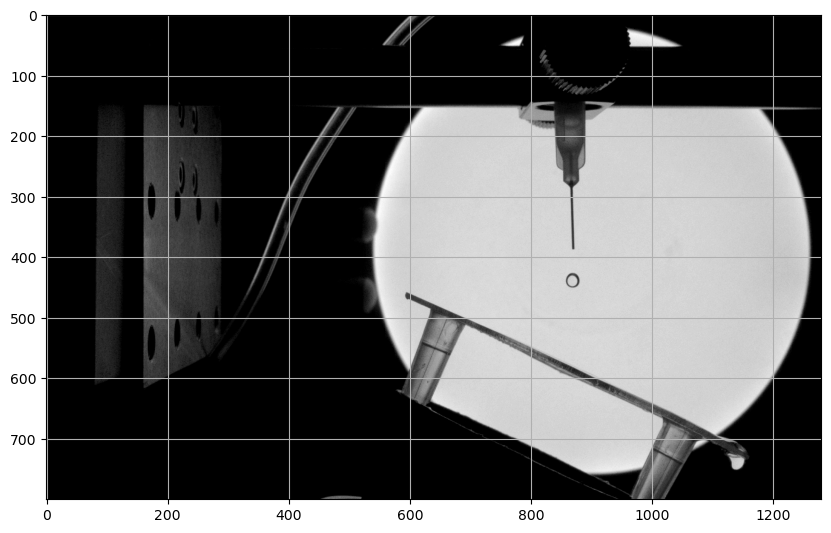

In [26]:
c._show_image_(img,filename="original.png")

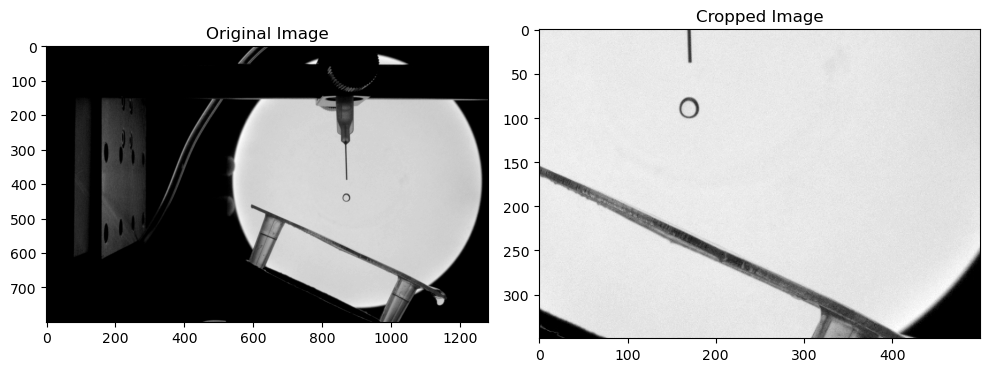

In [17]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
# plt.suptitle("Original and Cropped Image")    
plt.imshow(img, cmap='gray')
plt.title("Original Image")
img_c = c._crop_(img, 0,0,500,500)
plt.subplot(1,2,2)
plt.imshow(img_c, cmap='gray')
plt.title("Cropped Image")
plt.tight_layout()
plt.savefig("cropped.png")

In [10]:
PPT_PATH = r"presentation"

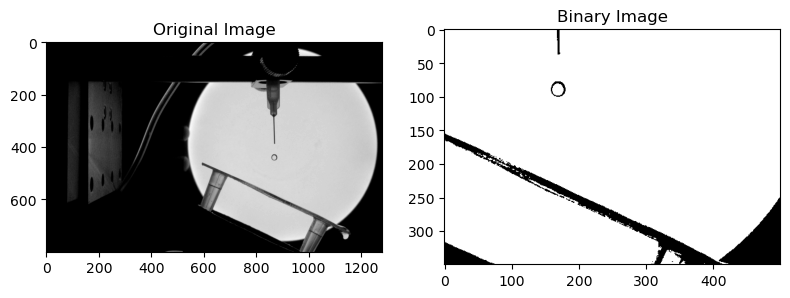

In [13]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)  
plt.imshow(img, cmap='gray')
plt.title("Original Image")
img_c = c._crop_(img, 0,0,500,500)
img_f = c._threshold_()
plt.subplot(1,2,2)
plt.imshow(img_f, cmap='gray')
plt.title("Binary Image")
plt.tight_layout()
plt.savefig(PPT_PATH + r"\binary.png")

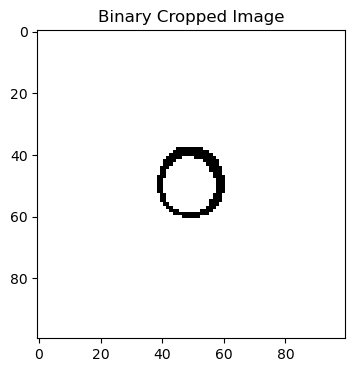

In [24]:
plt.figure(figsize=(8,4))
plt.imshow(img_f[40:140, 120:220], cmap='gray')
# plt.axis('off')
plt.title("Binary Cropped Image")
plt.savefig(PPT_PATH + r"\small.png")

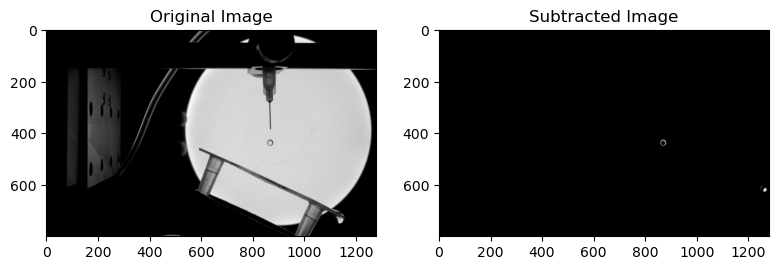

In [31]:
img_s = c._subtract_image_(img)
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.subplot(1,2,2)
plt.imshow(img_s, cmap='gray')
plt.title("Subtracted Image")
plt.tight_layout()
plt.savefig(PPT_PATH + r"\subtracted.png")